In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')




In [ ]:
df=pd.read_csv("/content/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


## Exploratory Data Analysis (EDA):

In [ ]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.describe(include=object)

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,3,3,3
top,Male,asymptomatic,normal,FALSE,flat,normal
freq,718,495,542,535,453,373


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


<Axes: >

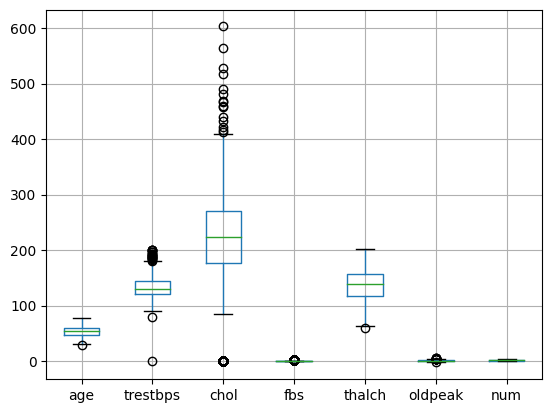

In [ ]:
df.boxplot()

In [ ]:
oldpeak_median=df['oldpeak'].median()

In [ ]:
df['oldpeak'].fillna(oldpeak_median,inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


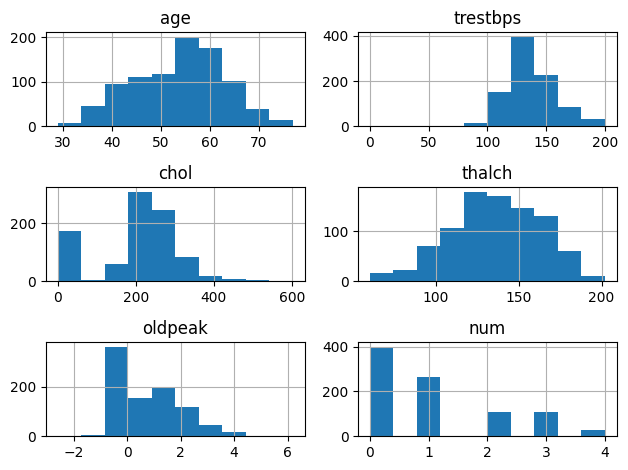

In [ ]:
df.hist()
plt.tight_layout()
plt.show()

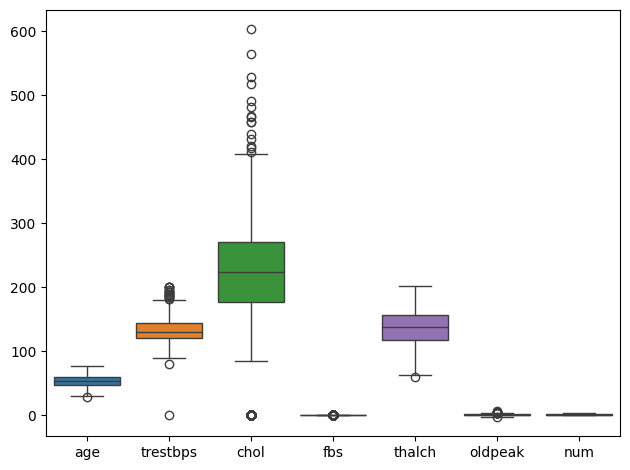

In [ ]:
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [ ]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.032205,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.008154,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.406078,1.000000


<Axes: >

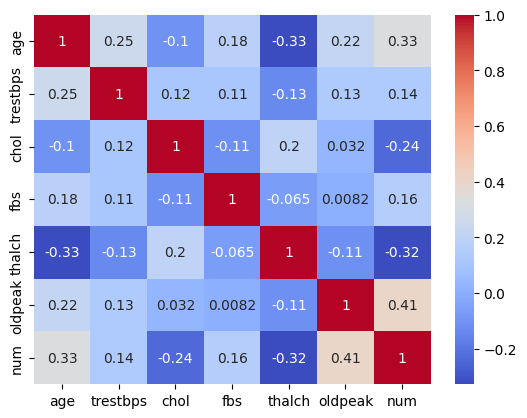

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

## **Feature Engineering**

In [ ]:
OE=OrdinalEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1.0,3.0,145,233,True,0.0,150,0.0,2.3,0.0,0.0,0
1,41,1.0,1.0,135,203,False,1.0,132,0.0,0.0,1.0,0.0,0
2,57,1.0,0.0,140,192,False,1.0,148,0.0,0.4,1.0,0.0,0
3,52,1.0,3.0,118,186,False,0.0,190,0.0,0.0,1.0,0.0,0
4,57,1.0,0.0,110,201,False,1.0,126,1.0,1.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1.0,0.0,125,0,False,1.0,120,0.0,1.5,2.0,2.0,4
904,62,1.0,0.0,166,170,False,2.0,120,1.0,3.0,1.0,2.0,4
905,56,1.0,2.0,170,0,False,0.0,123,1.0,2.5,0.0,0.0,4
906,56,1.0,2.0,144,208,True,2.0,105,2.0,0.5,0.0,1.0,4


In [ ]:
df["sex"].value_counts()

,count
sex,
1.0,718
0.0,190


In [ ]:
df["cp"].value_counts()

,count
cp,
0.0,495
2.0,203
1.0,165
3.0,45


In [ ]:
x=df.drop("num",axis=1)
y=df["num"]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1.0,3.0,145,233,True,0.0,150,0.0,2.3,0.0,0.0
1,41,1.0,1.0,135,203,False,1.0,132,0.0,0.0,1.0,0.0
2,57,1.0,0.0,140,192,False,1.0,148,0.0,0.4,1.0,0.0
3,52,1.0,3.0,118,186,False,0.0,190,0.0,0.0,1.0,0.0
4,57,1.0,0.0,110,201,False,1.0,126,1.0,1.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1.0,0.0,125,0,False,1.0,120,0.0,1.5,2.0,2.0
904,62,1.0,0.0,166,170,False,2.0,120,1.0,3.0,1.0,2.0
905,56,1.0,2.0,170,0,False,0.0,123,1.0,2.5,0.0,0.0
906,56,1.0,2.0,144,208,True,2.0,105,2.0,0.5,0.0,1.0


In [ ]:
scaler=MinMaxScaler()
x1=scaler.fit_transform(x)

In [ ]:
x=pd.DataFrame(x1,columns=x.columns)

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.708333,1.0,1.000000,0.725,0.386401,1.0,0.0,0.633803,0.0,0.556818,0.0,0.0
1,0.250000,1.0,0.333333,0.675,0.336650,0.0,0.5,0.507042,0.0,0.295455,0.5,0.0
2,0.583333,1.0,0.000000,0.700,0.318408,0.0,0.5,0.619718,0.0,0.340909,0.5,0.0
3,0.479167,1.0,1.000000,0.590,0.308458,0.0,0.0,0.915493,0.0,0.295455,0.5,0.0
4,0.583333,1.0,0.000000,0.550,0.333333,0.0,0.5,0.464789,0.5,0.465909,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1.0,0.000000,0.625,0.000000,0.0,0.5,0.422535,0.0,0.465909,1.0,1.0
904,0.687500,1.0,0.000000,0.830,0.281924,0.0,1.0,0.422535,0.5,0.636364,0.5,1.0
905,0.562500,1.0,0.666667,0.850,0.000000,0.0,0.0,0.443662,0.5,0.579545,0.0,0.0
906,0.562500,1.0,0.666667,0.720,0.344942,1.0,1.0,0.316901,1.0,0.352273,0.0,0.5


In [ ]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


## **Decision Tree Classification**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
797,0.666667,1.0,0.000000,0.94,0.000000,1.0,1.0,0.183099,0.0,0.465909,0.5,1.0
111,0.500000,1.0,0.666667,0.65,0.407960,1.0,0.0,0.795775,0.0,0.295455,1.0,0.5
585,0.416667,1.0,0.000000,0.70,0.388060,0.0,0.5,0.563380,0.5,0.409091,0.5,0.5
16,0.354167,0.0,0.666667,0.71,0.293532,0.0,0.0,0.704225,0.5,0.454545,0.0,0.5
214,0.625000,1.0,0.000000,0.70,0.454395,0.0,0.5,0.661972,0.5,0.522727,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.395833,1.0,0.333333,0.70,0.394693,0.0,0.5,0.408451,0.0,0.295455,0.5,1.0
643,0.479167,1.0,0.000000,0.80,0.548922,0.0,0.5,0.239437,0.5,0.579545,1.0,0.0
249,0.395833,0.0,0.000000,0.60,0.421227,0.0,1.0,0.352113,0.0,0.295455,0.0,0.0
664,0.312500,1.0,0.000000,0.60,0.280265,0.0,0.5,0.591549,0.5,0.613636,0.0,0.0


In [ ]:
y_train

,num
797,3
111,0
585,1
16,0
214,0
...,...
256,0
643,1
249,0
664,2


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
871,0.458333,1.0,0.666667,0.755,0.562189,0.0,0.5,0.436620,0.0,0.352273,1.0,0.5
741,0.645833,1.0,0.000000,0.710,0.358209,0.0,0.5,0.352113,0.5,0.579545,0.5,0.5
487,0.520833,1.0,0.333333,0.960,0.469320,0.0,0.0,0.950704,0.0,0.295455,1.0,1.0
785,0.520833,1.0,0.000000,0.550,0.341625,0.0,0.0,0.338028,0.5,0.295455,0.5,0.5
548,0.520833,0.0,0.666667,0.650,0.487562,0.0,1.0,0.281690,0.5,0.295455,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.541667,1.0,0.000000,0.610,0.369818,1.0,1.0,0.281690,0.0,0.295455,0.5,0.0
795,0.562500,0.0,0.000000,1.000,0.477612,1.0,0.0,0.514085,0.5,0.750000,0.0,1.0
750,0.500000,1.0,0.000000,0.770,0.000000,1.0,1.0,0.563380,0.5,0.465909,0.5,1.0
137,0.729167,0.0,0.000000,0.900,0.538972,0.0,0.5,0.661972,0.5,0.295455,1.0,0.5


In [ ]:
y_test

,num
871,3
741,2
487,1
785,3
548,1
...,...
674,2
795,3
750,2
137,0


In [ ]:
model=DecisionTreeClassifier(criterion='gini',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.5860710144042969, 0.96875, 'x[2] <= 0.167\ngini = 0.699\nsamples = 726\nvalue = [312.0, 213.0, 84.0, 92.0, 25.0]'),
 Text(0.33246612548828125, 0.90625, 'x[0] <= 0.635\ngini = 0.735\nsamples = 398\nvalue = [74, 162, 68, 71, 23]'),
 Text(0.45926856994628906, 0.9375, 'True  '),
 Text(0.1518096923828125, 0.84375, 'x[8] <= 0.25\ngini = 0.69\nsamples = 264\nvalue = [61, 124, 36, 33, 10]'),
 Text(0.0654296875, 0.78125, 'x[4] <= 0.07\ngini = 0.712\nsamples = 110\nvalue = [42.0, 36.0, 18.0, 7.0, 7.0]'),
 Text(0.029296875, 0.71875, 'x[7] <= 0.57\ngini = 0.697\nsamples = 31\nvalue = [2, 10, 13, 3, 3]'),
 Text(0.015625, 0.65625, 'x[3] <= 0.645\ngini = 0.76\nsamples = 20\nvalue = [2, 7, 5, 3, 3]'),
 Text(0.0078125, 0.59375, 'x[9] <= 0.239\ngini = 0.758\nsamples = 16\nvalue = [2, 6, 2, 3, 3]'),
 Text(0.00390625, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.01171875, 0.53125, 'x[7] <= 0.232\ngini = 0.786\nsamples = 14\nvalue = [2, 4, 2, 3, 3]'),
 Text(0.0078125, 0.468

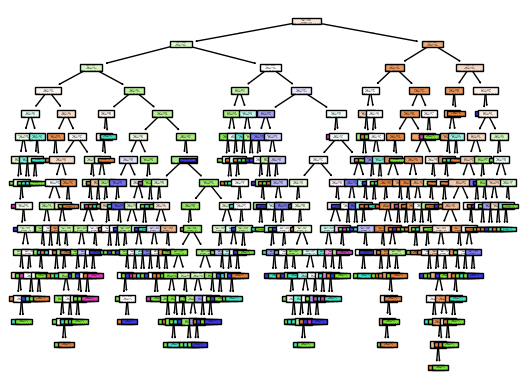

In [ ]:
tree.plot_tree(model,filled=True)

In [ ]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

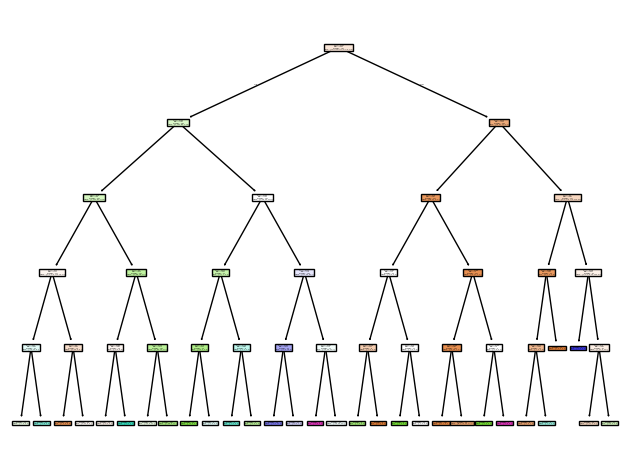

In [ ]:
tree.plot_tree(model,filled=True)
plt.tight_layout()

In [ ]:
fn=x.columns
fn

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [ ]:
y.unique()

array([0, 1, 2, 3, 4])

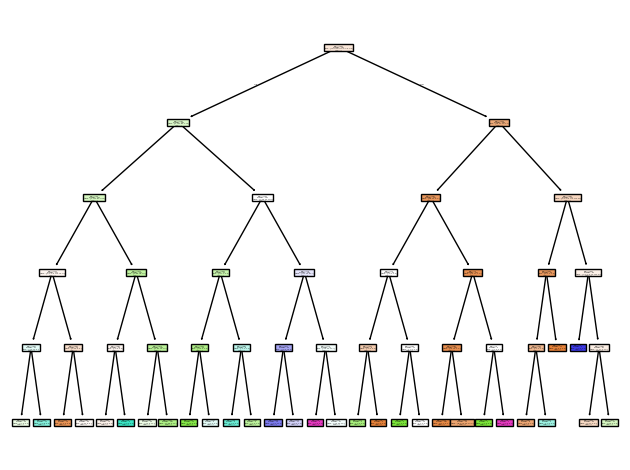

In [ ]:
fn=x.columns
cn=['0','1','2','3','4']
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.tight_layout()

In [ ]:
predict=model.predict(x_test)

In [ ]:
predict

array([0, 2, 0, 1, 0, 3, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 3, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 3,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 3, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 4, 2,
       2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0,
       0, 0, 2, 1, 2, 0])

In [ ]:
pd.Series(predict).value_counts()

,count
0,98
1,44
2,33
3,6
4,1


In [ ]:
print("train_accuracy:",model.score(x_train,y_train))
print("test_accuracy:",model.score(x_test,y_test))

train_accuracy: 0.6460055096418733
test_accuracy: 0.4945054945054945


In [ ]:
model.feature_importances_

array([0.18763665, 0.07278759, 0.39296238, 0.0264571 , 0.14747397,
       0.        , 0.02537628, 0.04187027, 0.05155275, 0.05388302,
       0.        , 0.        ])

In [ ]:
pd.crosstab(y_test,predict)

col_0,0,1,2,3,4
num,,,,,
0,66,11,10,0,0
1,23,15,11,2,1
2,4,12,7,2,0
3,3,5,5,2,0
4,2,1,0,0,0


In [ ]:
np.mean(predict==y_test)

0.4945054945054945

In [ ]:
accuracy = accuracy_score(y_test, predict)
report = classification_report(y_test, predict)

In [ ]:
accuracy

0.4945054945054945

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.67      0.76      0.71        87\n           1       0.34      0.29      0.31        52\n           2       0.21      0.28      0.24        25\n           3       0.33      0.13      0.19        15\n           4       0.00      0.00      0.00         3\n\n    accuracy                           0.49       182\n   macro avg       0.31      0.29      0.29       182\nweighted avg       0.48      0.49      0.48       182\n'

## **Hyperparameter Tuning**

In [ ]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6,7,8,9],

}

In [102]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

In [103]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [110]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

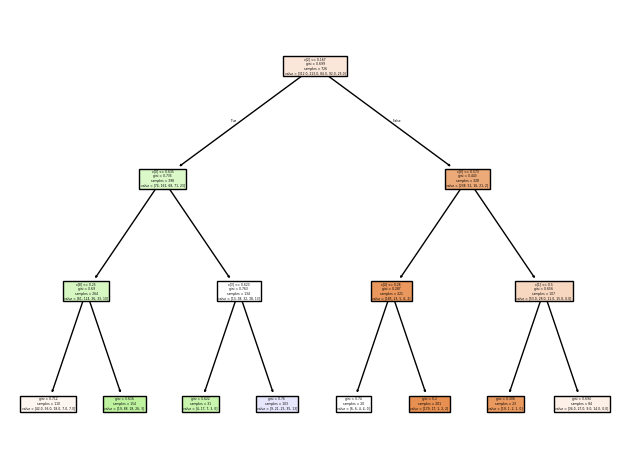

In [111]:
tree.plot_tree(model,filled=True)
plt.tight_layout()

In [112]:
predict=model.predict(x_test)

In [113]:
predict

array([0, 3, 0, 1, 0, 3, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0,
       0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 3, 0])

In [114]:
print("train_accuracy:",model.score(x_train,y_train))
print("test_accuracy:",model.score(x_test,y_test))

train_accuracy: 0.5785123966942148
test_accuracy: 0.5164835164835165


In [115]:
accuracy = accuracy_score(y_test, predict)
report = classification_report(y_test, predict)

In [116]:
accuracy

0.5164835164835165

In [117]:
report

'              precision    recall  f1-score   support\n\n           0       0.62      0.84      0.72        87\n           1       0.39      0.35      0.37        52\n           2       0.00      0.00      0.00        25\n           3       0.16      0.20      0.18        15\n           4       0.00      0.00      0.00         3\n\n    accuracy                           0.52       182\n   macro avg       0.23      0.28      0.25       182\nweighted avg       0.42      0.52      0.46       182\n'